<a href="https://colab.research.google.com/github/Rajesheeda/Music-Genre-Identification/blob/main/DL_Music__genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 2 : Music Genre Identification
Download data from here :  https://www.dropbox.com/s/4jw31k5mlzcmgis/genres.tar.gz?dl=0

Goal : Given audio files for songs , identify which genre they fall in

Suggested Guidelines :

1. You'll have to prepare and maintain your own version of train and validation from the full data given

2. Major challenge here is to create features from audio files which can then be passed to your choice of deep learning algorithm

3. 3. Your solution needs to be uploaded on GitHub repo at Github Website and then share the repository link to lalit.sachan@edvancer.in

In [8]:
# !wget -q --show-progres https://www.dropbox.com/s/4jw31k5mlzcmgis/genres.tar.gz

genres.tar.gz       100%[===================>]   1.14G   108MB/s    in 12s     


In [10]:
# !tar -xvzf genres.tar.gz

genres/
genres/blues/
genres/blues/blues.00000.au
genres/blues/blues.00001.au
genres/blues/blues.00002.au
genres/blues/blues.00003.au
genres/blues/blues.00004.au
genres/blues/blues.00005.au
genres/blues/blues.00006.au
genres/blues/blues.00007.au
genres/blues/blues.00008.au
genres/blues/blues.00009.au
genres/blues/blues.00010.au
genres/blues/blues.00011.au
genres/blues/blues.00012.au
genres/blues/blues.00013.au
genres/blues/blues.00014.au
genres/blues/blues.00015.au
genres/blues/blues.00016.au
genres/blues/blues.00017.au
genres/blues/blues.00018.au
genres/blues/blues.00019.au
genres/blues/blues.00020.au
genres/blues/blues.00021.au
genres/blues/blues.00022.au
genres/blues/blues.00023.au
genres/blues/blues.00024.au
genres/blues/blues.00025.au
genres/blues/blues.00026.au
genres/blues/blues.00027.au
genres/blues/blues.00028.au
genres/blues/blues.00029.au
genres/blues/blues.00030.au
genres/blues/blues.00031.au
genres/blues/blues.00032.au
genres/blues/blues.00033.au
genres/blues/blues.00034.a

In [11]:
# !rm /content/genres.tar.gz

In [4]:
!pip install pydub

In [5]:
import os
from pydub import AudioSegment
from pydub.playback import play
from IPython.display import display


In [13]:


# Assuming 'audio_file.mp3' is the path to your audio file
audio = AudioSegment.from_file("/content/genres/blues/blues.00003.au", "au")
display(audio) # This will not play, but it is required to display anything with pydub
play(audio) # Play the audio

# Listening to each audio genre

In [14]:
for path in os.listdir("/content/genres/"):
  print(path)
  for file in os.listdir("/content/genres/"+path):
    print(file)
    # Assuming 'audio_file.mp3' is the path to your audio file
    audio = AudioSegment.from_file("/content/genres/"+path+"/"+file, "au")
    display(audio) # This will not play, but it is required to display anything with pydub
    play(audio) # Play the audio

    break


blues
blues.00075.au


hiphop
hiphop.00094.au


rock
rock.00001.au


reggae
reggae.00012.au


disco
disco.00054.au


classical
classical.00019.au


jazz
jazz.00034.au


country
country.00041.au


pop
pop.00083.au


metal
metal.00011.au


In [16]:
!pip install split-folders

# Splitting train and test folders

In [17]:
import splitfolders
# Define the input and output folders
input_folder = "/content/genres"  # Path to your 'genres' folder
output_folder = "/content/data"  # Path to create for train/test folders

# Split the data into train and test sets (80% train, 20% test)
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(0.8, 0.2))

Copying files: 1000 files [00:04, 203.62 files/s]


# Creating Spectogram

**For a single audio**

In [18]:
!pip install librosa

In [6]:
import librosa
import numpy
import matplotlib.pyplot as plt
import numpy as np

In [20]:
audio_file = "/content/data/train/blues/blues.00000.au"
y, sr = librosa.load(audio_file)


In [21]:
y,sr

(array([ 0.00732422,  0.01660156,  0.00762939, ..., -0.05560303,
        -0.06106567, -0.06417847], dtype=float32),
 22050)

In [22]:
spectogram = librosa.feature.melspectrogram(y=y, sr=sr)
spectogram_db = librosa.power_to_db(spectogram, ref=np.max)

In [23]:
spectogram_db.shape

(128, 1293)

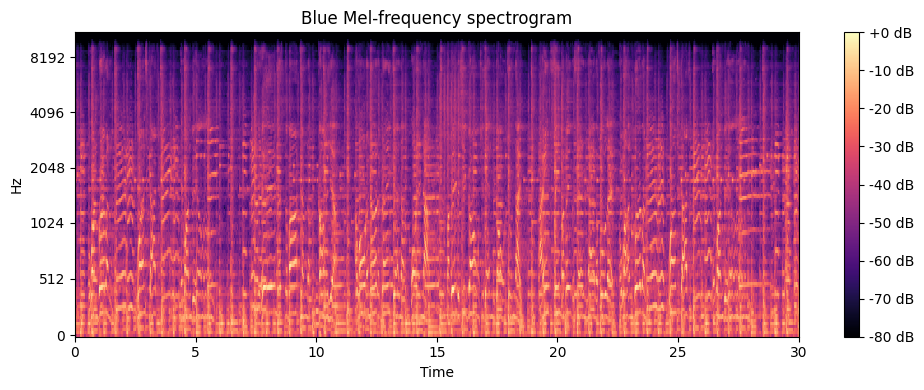

In [24]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(spectogram_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Blue Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

**For every audio**

In [25]:

classes = [a for a in os.listdir('/content/genres') if '.' not in a]
print(classes)


['blues', 'hiphop', 'rock', 'reggae', 'disco', 'classical', 'jazz', 'country', 'pop', 'metal']


In [10]:

def func1(cls):
  train_audios = os.listdir('/content/drive/MyDrive/Deeplearning/data/train/'+cls+'/')
  test_audios = os.listdir('/content/drive/MyDrive/Deeplearning/data/test/'+cls+'/')
  os.makedirs('/content/drive/MyDrive/Deeplearning/spectrogram/train/'+cls)
  os.makedirs('/content/drive/MyDrive/Deeplearning/spectrogram/test/'+cls)
  print(cls)
  train_names = train_audios
  test_names = test_audios
  cnt = 0
  for nm in train_names:
    cnt+=1
    x , sr = librosa.load('/content/drive/MyDrive/Deeplearning/data/train/'+cls+'/'+nm)
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb)
    plt.savefig('/content/drive/MyDrive/Deeplearning/spectrogram/train/'+cls+'/'+str(cnt)+'.png')
    plt.close()

  cnt = 0
  for nm in test_names:
    cnt+=1
    x , sr = librosa.load('/content/drive/MyDrive/Deeplearning/data/test/'+cls+'/'+nm)
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb)
    plt.savefig('/content/drive/MyDrive/Deeplearning/spectrogram/test/'+cls+'/'+str(cnt)+'.png')
    plt.close()



In [ ]:
for audio_genre in [ 'reggae', 'disco', 'classical', 'jazz', 'country', 'pop', 'metal']:
  func1(audio_genre)

reggae
disco


In [3]:
# !rm -rf /content/spectrogram/train/hiphop

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# !cp -r /content/data /content/drive/MyDrive/Deeplearning

In [1]:
# !cp -r /content/spectrogram/test/blues /content/drive/MyDrive/Deeplearning/spectrogram/test/blues

In [2]:
# !cp -r /content/spectrogram/train/blues /content/drive/MyDrive/Deeplearning/spectrogram/train/blues